In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import MSELoss
import os, sys
# os.chdir("..")
sys.path.append(os.path.join(os.getcwd().split("KAMemory")[0], "KAMemory/src"))
import models
import utils
import main
from logger import logger

from tqdm import tqdm
from scipy.ndimage import convolve1d

%load_ext autoreload
%autoreload

logger(".")

2025-05-08 15:03:52 | .


**General Settings**

In [19]:
np.random.seed(1337)

dim_ei = 50
dim_ca3 = 50 
dim_ca1 = 50
dim_eo = dim_ei

# model hyper-parameters
K = 5
K_lat = 15
beta = 60

# decodability wrt IS
---

**main simulation**

In [3]:
""" random IS """
results = utils.train_for_reconstruction_v2(alpha=0.3, num_samples=5,
                                            verbose=False, bias=True, use_lec=False, idx=1,
                                            binarize=0)

2025-05-08 15:03:52 | kwargs.get('idx', 0)=1
2025-05-08 15:03:52 | loading idx=1, cache_dir='/Users/daniekru/Research/lab/KAMemory/cache' cache_dir_2='/Users/daniekru/Research/lab/KAMemory/src/cache' os.getcwd()='/Users/daniekru/Research/lab/KAMemory/notebooks'
2025-05-08 15:03:52 | Pre-selected session: [1]
2025-05-08 15:03:52 | bias not found in the info file, set to True
2025-05-08 15:03:52 | bias=True
/Users/daniekru/Research/lab/KAMemory/src/models.py:442: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be

{'K': 5,
 'K_lat': 18,
 'beta': 54,
 'date': '02/04/2025 16:15:28',
 'dim_ca1': 50,
 'dim_ca3': 50,
 'dim_ei': 50,
 'dim_eo': 50,
 'epochs': 2000,
 'loss_ae': 0.05364,
 'num_samples': 20000}


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 86.68it/s]
2025-05-08 15:03:52 | kwargs.get('idx', 0)=1
2025-05-08 15:03:52 | loading idx=1, cache_dir='/Users/daniekru/Research/lab/KAMemory/src/cache' cache_dir_2='/Users/daniekru/Research/lab/KAMemory/src/cache' os.getcwd()='/Users/daniekru/Research/lab/KAMemory/notebooks'
2025-05-08 15:03:52 | Pre-selected session: [1]
2025-05-08 15:03:52 | bias not found in the info file, set to True
2025-05-08 15:03:52 | bias=True
2025-05-08 15:03:52 | info:


{'K': 5,
 'K_lat': 18,
 'beta': 54,
 'date': '02/04/2025 16:15:28',
 'dim_ca1': 50,
 'dim_ca3': 50,
 'dim_ei': 50,
 'dim_eo': 50,
 'epochs': 2000,
 'loss_ae': 0.05364,
 'num_samples': 20000}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 3076.81it/s]
2025-05-08 15:03:52 | loading idx=1, cache_dir='/Users/daniekru/Research/lab/KAMemory/src/cache' cache_dir_2='/Users/daniekru/Research/lab/KAMemory/src/cache' os.getcwd()='/Users/daniekru/Research/lab/KAMemory/notebooks'
2025-05-08 15:03:52 | bias not found in the info file, set to True
2025-05-08 15:03:52 | bias=True
2025-05-08 15:03:52 | len(data)=5, len(data[0])=50
2025-05-08 15:03:52 | data.shape=torch.Size([5, 50])
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 2216.16it/s]


## our IS

### plot b.c | decodability

In [5]:
colors = ['blue', 'red', 'orange']
points = [[utils.cross_entropy(torch.tensor(results['activity_mtl'][k][0]).reshape(-1),
                         torch.tensor(results['activity_mtl'][k][1]).reshape(-1)).item(),
           utils.cross_entropy(torch.tensor(results['activity_mtl'][k][0]).reshape(-1),
                         torch.tensor(results['activity_mtl'][k][3]).reshape(-1)).item(),
           colors[i]] for i, k in enumerate([0, 2, 9])]

points += [[utils.cross_entropy(torch.tensor(results['activity_mtl'][0][0]).reshape(-1),
                         torch.tensor(results['activity_mtl'][0][5]).reshape(-1)).item(),
            utils.cross_entropy(torch.tensor(results['activity_mtl'][0][0]).reshape(-1),
                         torch.tensor(results['activity_mtl'][0][5]).reshape(-1)).item(),
            colors[0]]]

line = np.array([[p[0], p[1]] for p in points]).flatten()
logger()

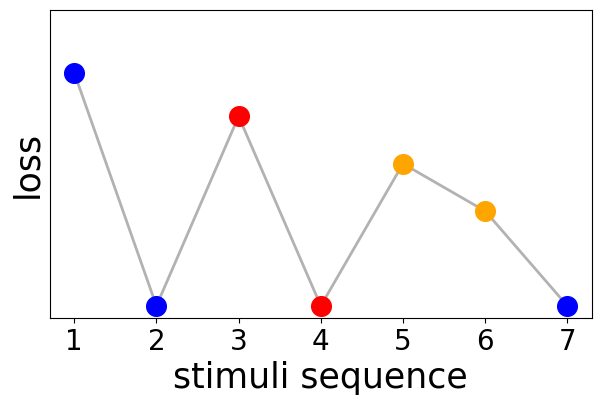

In [6]:
""" plot """
fig_mtl, ax = plt.subplots(figsize=(7, 4))

# Plot the line with a lower z-order
ax.plot(range(1, 8), line[:-1], 'k-', lw=2, zorder=1, alpha=0.3)

# Plot scatter points with a higher z-order
for j, p in enumerate(points):
    ax.scatter(j*2+1, p[0], color=p[2], s=200, zorder=2)
    if j == len(points) - 1:
        continue
    ax.scatter(j*2+2, p[1], color=p[2], s=200, zorder=2)

ax.set_ylim(-1, 25)
ax.set_yticks(())
ax.set_xticks(range(1, 8), range(1, 8), fontsize=20)
ax.set_xlabel("stimuli sequence", fontsize=25)
ax.set_ylabel("loss", fontsize=25)
plt.show()


### plot b.d | patterns

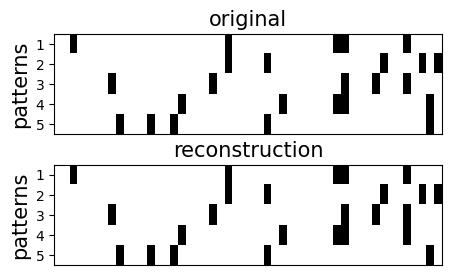

In [12]:
""" plot """
fig_bd, (ax12, ax22) = plt.subplots(2, 1, figsize=(5, 3), sharex=True)

plt.subplots_adjust(hspace=0.3)

is_squash = False
fontsize=20

utils.plot_squashed_data(data=results["data"],
                         ax=ax12,
                         title="original",
                         proper_title=True)
utils.plot_squashed_data(data=results["out_mtl"], ax=ax22,
                         title=f"reconstruction",
                         proper_title=True)

ax12.set_ylabel("patterns", fontsize=15)
ax22.set_ylabel("patterns", fontsize=15)
plt.show()

## random IS

### plot a.c | decodability

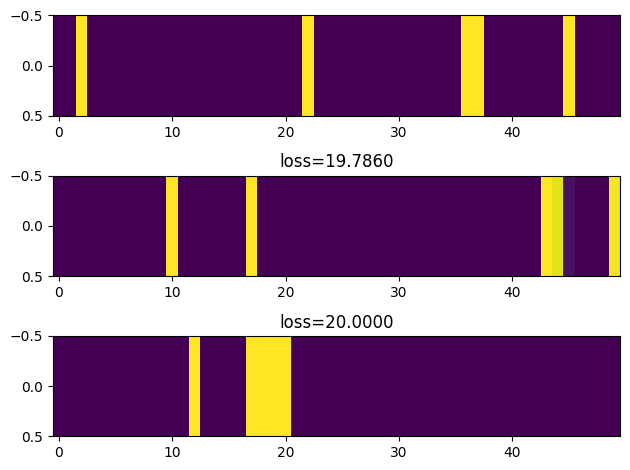

In [7]:
""" random """
idx = 10

fig = plt.figure()
fig_ac.set_tight_layout({'h_pad': 1})

plt.subplot(311)
plt.imshow(results['activity_rnd'][idx][0].reshape(1, -1), aspect='auto')

plt.subplot(312)
plt.imshow(results['activity_rnd'][idx][1].reshape(1, -1), aspect='auto')
plt.title(f"loss={results['activity_rnd'][idx][2]:.4f}")

plt.subplot(313)
plt.imshow(results['activity_rnd'][idx][6].reshape(1, -1), aspect='auto')
plt.title(f"loss={results['activity_rnd'][idx][4]:.4f}")
plt.show()

In [8]:
colors = ['blue', 'red', 'orange']
points = [[utils.cross_entropy(torch.tensor(results['activity_rnd'][k][0]).reshape(-1),
                         torch.tensor(results['activity_rnd'][k][1]).reshape(-1)).item(),
           utils.cross_entropy(torch.tensor(results['activity_rnd'][k][0]).reshape(-1),
                         torch.tensor(results['activity_rnd'][k][3]).reshape(-1)).item(),
           colors[i]] for i, k in enumerate([0, 2, 9])]

points += [[utils.cross_entropy(torch.tensor(results['activity_rnd'][0][0]).reshape(-1),
                          torch.tensor(results['activity_rnd'][0][6]).reshape(-1)).item(),
            utils.cross_entropy(torch.tensor(results['activity_rnd'][0][0]).reshape(-1),
                         torch.tensor(results['activity_rnd'][0][6]).reshape(-1)).item(),
            colors[0]]]

line = np.array([[p[0], p[1]] for p in points]).flatten()
logger()

2025-05-08 15:06:41 | 


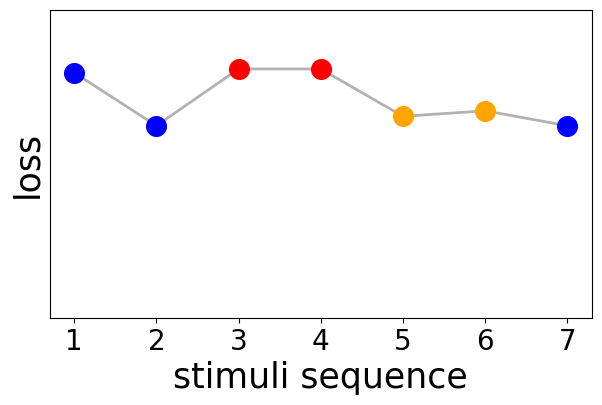

In [9]:
""" plot """
fig_rnd, ax = plt.subplots(figsize=(7, 4))

# Plot the line with a lower z-order
ax.plot(range(1, 8), line[:-1], 'k-', lw=2, zorder=1, alpha=0.3)

# Plot scatter points with a higher z-order
for j, p in enumerate(points):
    ax.scatter(j*2+1, p[0], color=p[2], s=200, zorder=2)
    if j == len(points) - 1:
        continue
    ax.scatter(j*2+2, p[1], color=p[2], s=200, zorder=2)

ax.set_ylim(-1, 25)
ax.set_yticks(())
ax.set_xticks(range(1, 8), range(1, 8), fontsize=20)
ax.set_xlabel("stimuli sequence", fontsize=25)
ax.set_ylabel("loss", fontsize=25)
plt.show()


### plot a.d | patterns

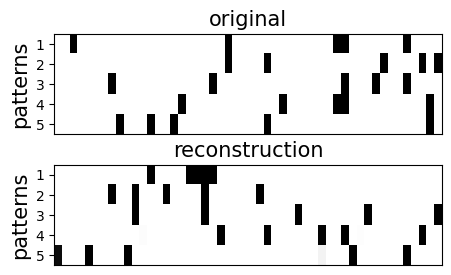

In [10]:
""" plot """
fig_ad, (ax12, ax22) = plt.subplots(2, 1, figsize=(5, 3), sharex=True)

plt.subplots_adjust(hspace=0.3)

is_squash = False
fontsize=20

utils.plot_squashed_data(data=results["data"],
                         ax=ax12,
                         title="original",
                         proper_title=True)
utils.plot_squashed_data(data=results["out_mtl_rnd"], ax=ax22,
                         title=f"reconstruction",
                         proper_title=True)

ax12.set_ylabel("patterns", fontsize=15)
ax22.set_ylabel("patterns", fontsize=15)
plt.show()

## plot with spatial patterns

In [14]:
""" main simulation """
results = utils.train_for_reconstruction(alpha=0.1, num_samples=5,
                                         verbose=False, bias=True, use_lec=True, idx=0,
                                         binarize=0)

2025-05-08 15:12:56 | using LEC data
2025-05-08 15:12:56 | loading idx=0, cache_dir='/Users/daniekru/Research/lab/KAMemory/src/cache' cache_dir_2='/Users/daniekru/Research/lab/KAMemory/src/cache' os.getcwd()='/Users/daniekru/Research/lab/KAMemory/notebooks'
2025-05-08 15:12:56 | bias=False
/Users/daniekru/Research/lab/KAMemory/src/models.py:442: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_sa

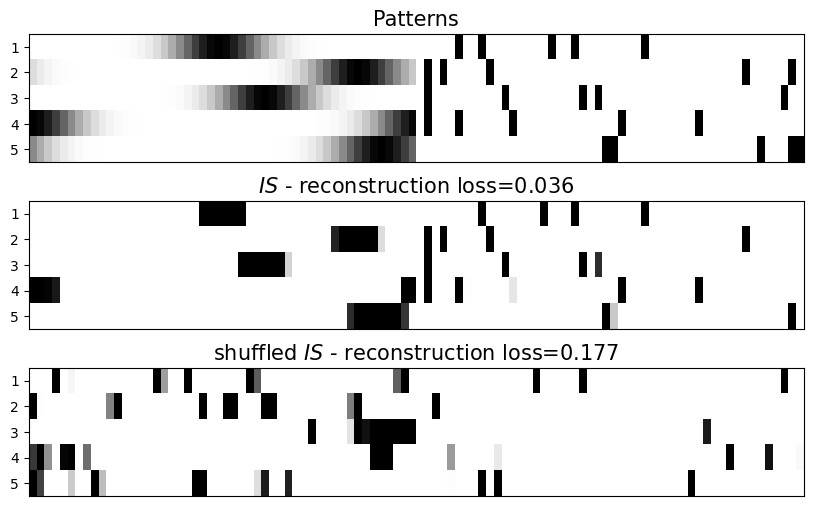

In [16]:
""" plot """
fig, (ax12, ax22, ax32) = plt.subplots(3, 1,
                                figsize=(10, 6), sharex=True)

plt.subplots_adjust(hspace=0.3)

is_squash = False

utils.plot_squashed_data(data=results["data"],
                         ax=ax12,
                         title="Patterns",
                         proper_title=True)
utils.plot_squashed_data(data=results["out_mtl_rnd"], ax=ax32,
                         title=f"shuffled $IS$ - " + \
                f"reconstruction loss={results['rec_loss_rnd']:.3f}",
                         proper_title=True)
utils.plot_squashed_data(data=results["out_mtl"], ax=ax22,
                         title=f"$IS$ - " + \
                f"reconstruction loss={results['rec_loss']:.3f}",
                         proper_title=True)

plt.show()

# Memory capacity
---

In [24]:
""" data """
USE_BIAS = True
num_samples = 200
datasets = []

stimuli = utils.sparse_stimulus_generator(N=num_samples,
                                          K=K,
                                          size=dim_ei,
                                          plot=False)
datasets = []
for k in range(num_samples):
    data = torch.tensor(stimuli[:k+1], dtype=torch.float32)
    dataloader = DataLoader(TensorDataset(data),
                            batch_size=1,
                            shuffle=False)
    datasets += [dataloader]

""" autoencoder """
autoencoder = models.Autoencoder(input_dim=dim_ei,
                                 encoding_dim=dim_ca1,
                                 activation=None,
                                 K=K_lat,
                                 beta=beta,
                                 use_bias=USE_BIAS)
logger(f"%Autoencoder: {autoencoder}")

W_ei_ca1, W_ca1_eo, B_ei_ca1, B_ca1_eo = autoencoder.get_weights(bias=True)

logger()

2025-05-08 15:21:43 | %Autoencoder: Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
  )
)
2025-05-08 15:21:43 | 


**run**

In [31]:
num_rep = 20
alpha = 0.5

outputs = np.zeros((num_rep, num_samples, num_samples))

for l in tqdm(range(num_rep)):

    # data
    stimuli = utils.sparse_stimulus_generator(N=num_samples,
                                              K=K,
                                              size=dim_ei,
                                              plot=False)

    datasets = []
    for k in range(num_samples):
        data = torch.tensor(stimuli[:k+1], dtype=torch.float32)
        dataloader = DataLoader(TensorDataset(data),
                                batch_size=1,
                                shuffle=False)
        datasets += [dataloader]

    # run
    for i in tqdm(range(num_samples), disable=True):

        # make model
        model = models.MTL(W_ei_ca1=W_ei_ca1,
                    W_ca1_eo=W_ca1_eo,
                    B_ei_ca1=B_ei_ca1,
                    B_ca1_eo=B_ca1_eo,
                    dim_ca3=dim_ca3,
                    K_lat=K_lat,
                    K_ca3=10,
                    K_out=K,
                    beta=beta,
                    alpha=alpha)

        # train a dataset with pattern index 0.. i
        model.eval()
        with torch.no_grad():

            # one pattern at a time
            for batch in datasets[i]:
                # forward
                _ = model(batch[0].reshape(-1, 1))

        # test a dataset with pattern index 0.. i 
        model.pause_lr()
        model.eval()
        with torch.no_grad():
            # one pattern at a time
            for j, batch in enumerate(datasets[i]):
                x = batch[0].reshape(-1, 1)

                # forward
                y = model(x)

                value = (y.T @ x) / \
                    (torch.norm(x) * torch.norm(y))

                outputs[l, i, j] = (value.item() - 0.2) / 0.8

logger()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:42<00:00,  5.15s/it]
2025-05-08 15:27:13 | 


**plot**

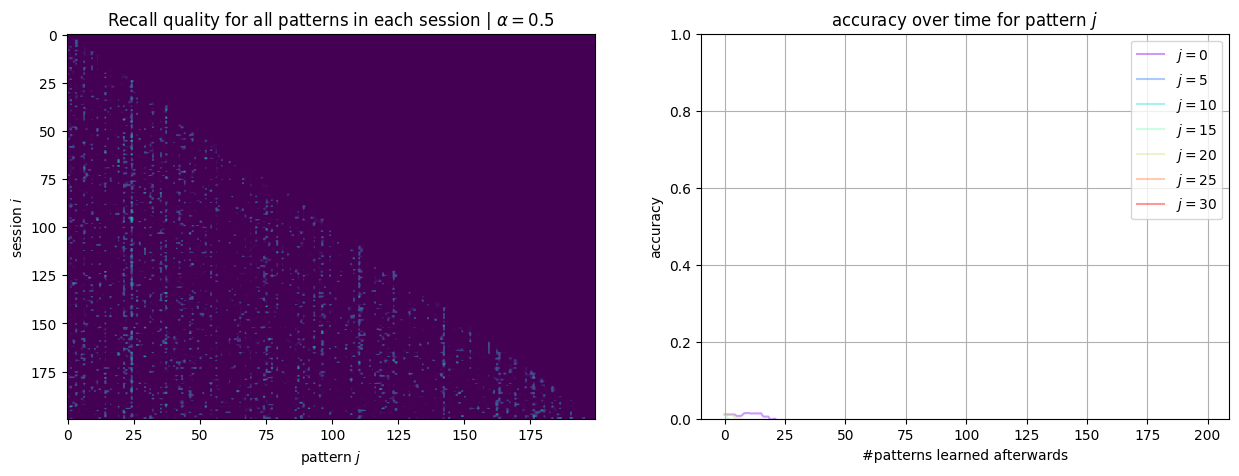

In [30]:
outputs1 = outputs.mean(axis=0) # -> (sample, sample)

fig0 = plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.imshow(outputs1, cmap="viridis",
           vmin=0, vmax=1, aspect="auto")
plt.title(f"Recall quality for all patterns in each session | $\\alpha=${alpha}")
plt.xlabel("pattern $j$")
plt.ylabel("session $i$")


plt.subplot(122)
# plt.axhline(0.1, color="r", linestyle="--",
#             alpha=0.2)
# smoothing
num_p = 7
jumps = 5
colors = plt.cm.rainbow(np.linspace(0, 1, num_p))
for di, d in enumerate(range(0, jumps*num_p, jumps)):
    output_d = outputs1[d:, d] # selection of one pattern
    nsmooth = 30
    padded_d = np.pad(output_d, (nsmooth-1, 0), mode="edge")
    output_d = np.convolve(padded_d,
                          np.ones(nsmooth)/nsmooth,
                          mode="valid")
    plt.plot(output_d, '-', label=f"$j=${d}", alpha=0.4,
             color=colors[di])

plt.ylim(0., 1)
plt.ylabel("accuracy")
plt.xlabel("#patterns learned afterwards")
plt.legend()
plt.title("accuracy over time for pattern $j$")
plt.grid()

plt.show()